In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
# import the dataset
crop = pd.read_csv(r'/content/drive/MyDrive/4th Year/SEM 2/NN /Dataset/crop_yield.csv')
crop.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [101]:
# checking the data types of the columns
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [102]:
# categories columns into numerical and categorical
numerical = ['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']
categorical = ['Crop', 'Crop_Year', 'Season', 'State']

In [103]:
# cheking the null values
crop.isnull().sum()

,0
Crop,0
Crop_Year,0
Season,0
State,0
Area,0
Production,0
Annual_Rainfall,0
Fertilizer,0
Pesticide,0
Yield,0


In [104]:
# check for duplicates
crop.duplicated().sum()


0

In [105]:
# Calculate descriptive statistics for the numerical data
crop.describe().T

,count,mean,std,min,25%,50%,75%,max
Crop_Year,19689.0,2.009128e+03,6.498099e+00,1997.00,2004.00,2010.00,2.015000e+03,2.020000e+03
Area,19689.0,1.799266e+05,7.328287e+05,0.50,1390.00,9317.00,7.511200e+04,5.080810e+07
Production,19689.0,1.643594e+07,2.630568e+08,0.00,1393.00,13804.00,1.227180e+05,6.326000e+09
Annual_Rainfall,19689.0,1.437755e+03,8.169096e+02,301.30,940.70,1247.60,1.643700e+03,6.552700e+03
Fertilizer,19689.0,2.410331e+07,9.494600e+07,54.17,188014.62,1234957.44,1.000385e+07,4.835407e+09
Pesticide,19689.0,4.884835e+04,2.132874e+05,0.09,356.70,2421.90,2.004170e+04,1.575051e+07
Yield,19689.0,7.995401e+01,8.783062e+02,0.00,0.60,1.03,2.388889e+00,2.110500e+04


There are no NULL values and duplicate records in the dataset

In [106]:
# value counts for the categorical data
for i in categorical:
  print(f"{i}:")
  print(crop[i].value_counts())
  print()

Crop:
Crop
Rice                     1197
Maize                     975
Moong(Green Gram)         740
Urad                      733
Groundnut                 725
Sesamum                   685
Potato                    628
Sugarcane                 605
Wheat                     545
Rapeseed &Mustard         528
Bajra                     524
Jowar                     513
Arhar/Tur                 508
Ragi                      498
Gram                      490
Small millets             485
Cotton(lint)              476
Onion                     454
Sunflower                 441
Dry chillies              419
Other Kharif pulses       382
Horse-gram                371
Peas & beans (Pulses)     369
Tobacco                   364
Other  Rabi pulses        355
Soyabean                  349
Turmeric                  337
Masoor                    324
Ginger                    323
Linseed                   308
Castor seed               300
Barley                    297
Sweet potato              273

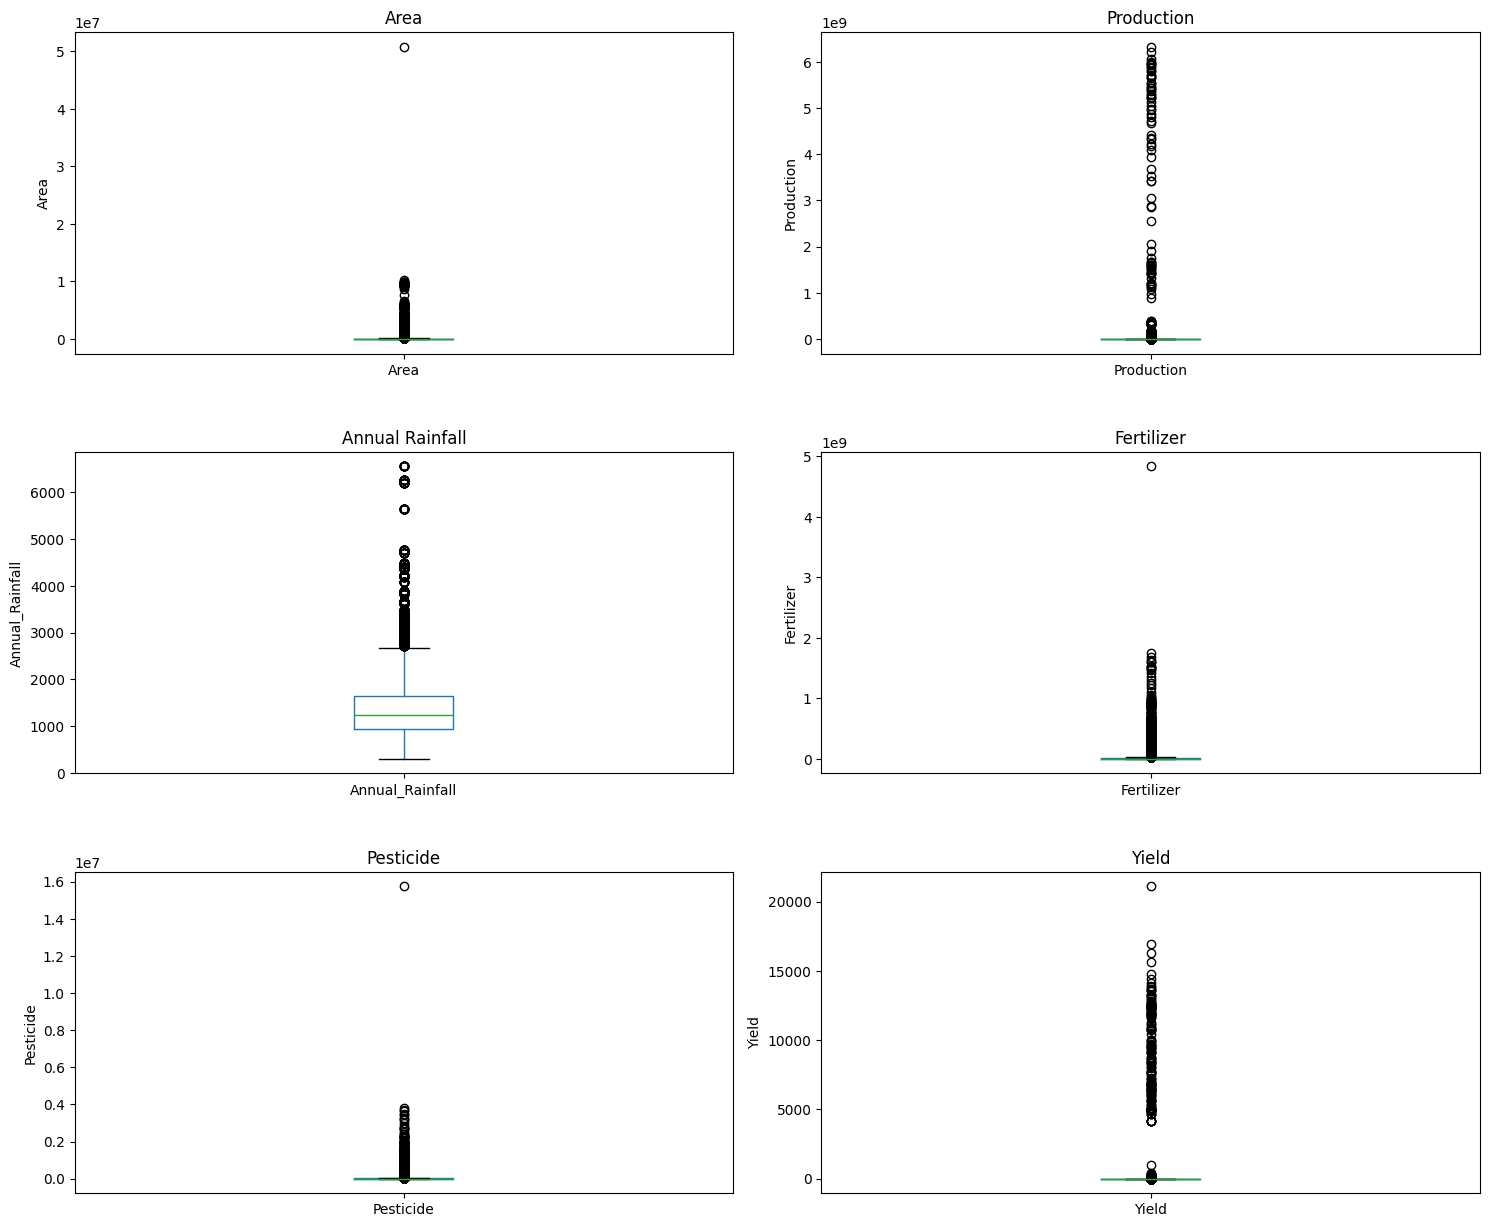

In [107]:
# checking for the outliers for the numerical columns

def title(x):
  return x.replace('_', ' ')

fig,axes = plt.subplots(nrows=3, ncols=2,figsize=(15,8))


#plotting boxplots
for i, ax in enumerate(axes.ravel()):
  crop.boxplot(numerical[i], grid=False, ax=ax)
  ax.set_title(f"{title(numerical[i])}")
  ax.set_ylabel(numerical[i])


fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

According to the scatter plots, all the numerical columns contain outliers. Since we make the model to the correct data (not for the outliers) we can remove those outliers

In [108]:
# Function to detect and remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Iterate over numerical columns and remove outliers
# new_crop = crop.copy()
# for column in numerical:
#     new_crop = remove_outliers_iqr(new_crop, column)

new_crop = crop.copy()
new_crop = remove_outliers_iqr(new_crop, 'Area')
new_crop = remove_outliers_iqr(new_crop, 'Production')
new_crop = remove_outliers_iqr(new_crop, 'Annual_Rainfall')
new_crop = remove_outliers_iqr(new_crop, 'Fertilizer')
new_crop = remove_outliers_iqr(new_crop, 'Pesticide')
new_crop = remove_outliers_iqr(new_crop, 'Yield')

new_crop = new_crop.copy()
new_crop = remove_outliers_iqr(new_crop, 'Area')
new_crop = remove_outliers_iqr(new_crop, 'Production')
new_crop = remove_outliers_iqr(new_crop, 'Annual_Rainfall')
new_crop = remove_outliers_iqr(new_crop, 'Fertilizer')
new_crop = remove_outliers_iqr(new_crop, 'Pesticide')
new_crop = remove_outliers_iqr(new_crop, 'Yield')


# Reset index
new_crop = new_crop.reset_index(drop=True)

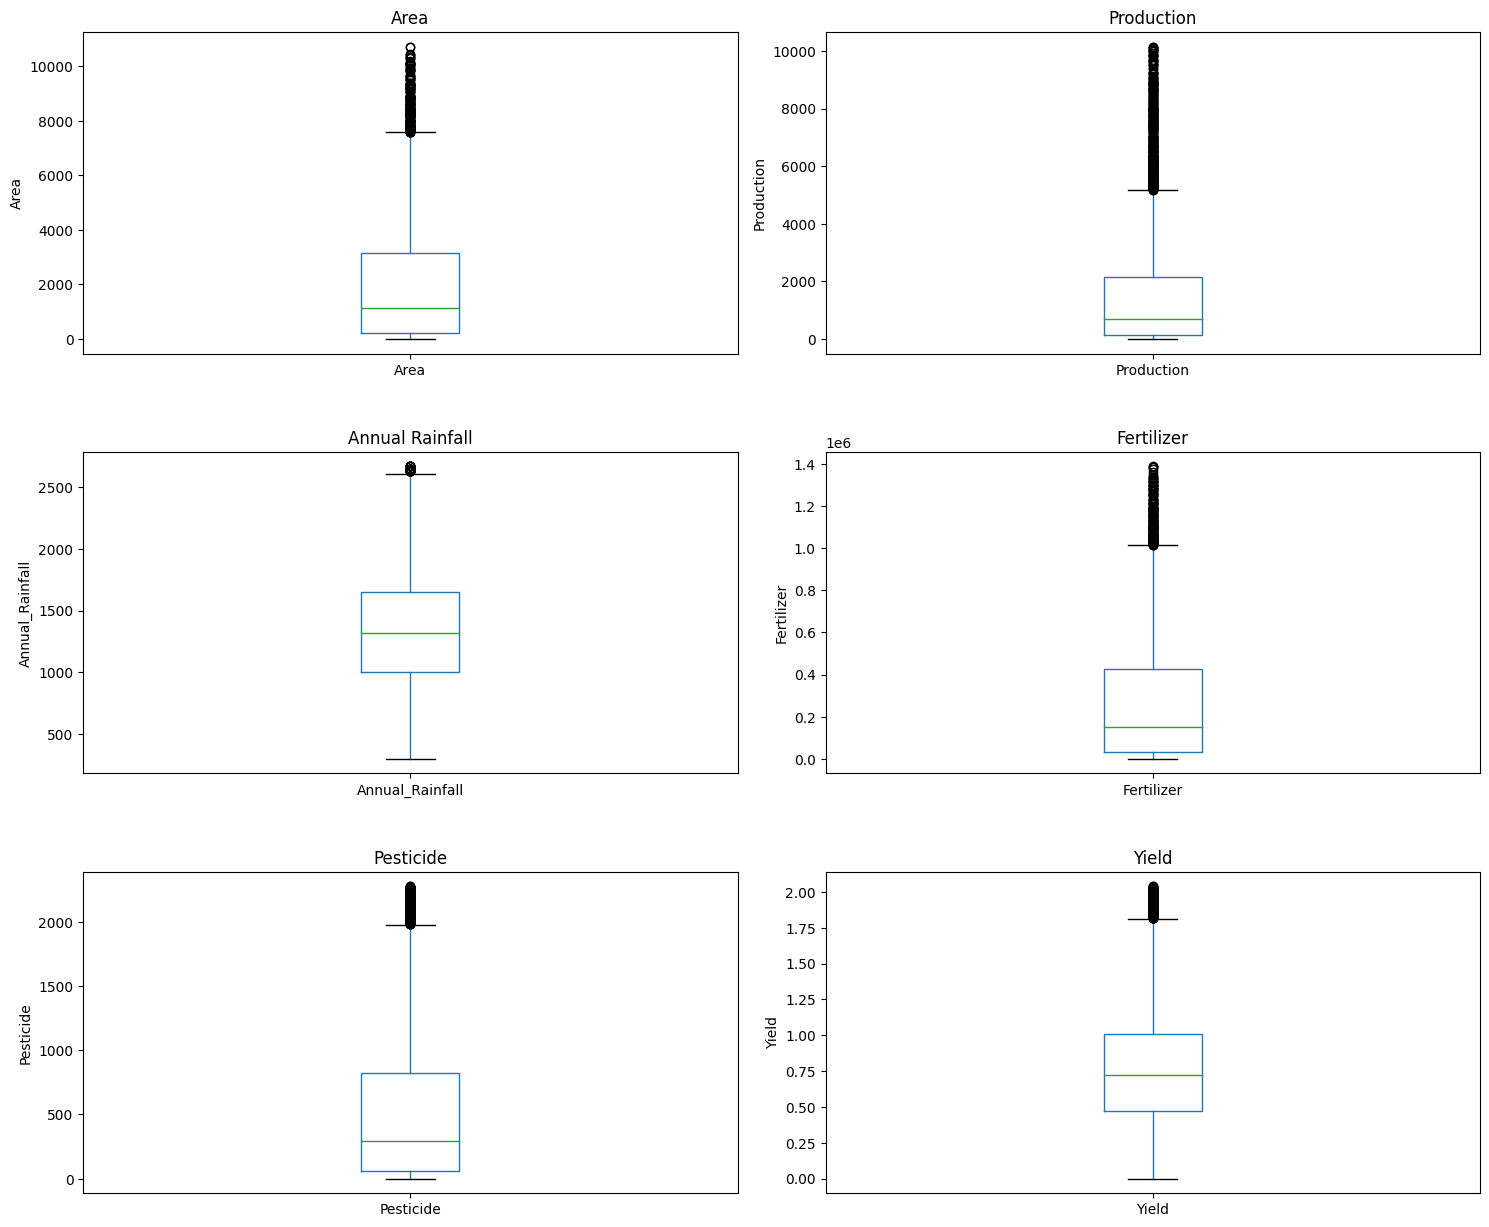

In [109]:
# checking for the outliers for the numerical columns
def title(x):
  return x.replace('_', ' ')

fig,axes = plt.subplots(nrows=3, ncols=2,figsize=(15,8))


#plotting boxplots
for i, ax in enumerate(axes.ravel()):
  new_crop.boxplot(numerical[i], grid=False, ax=ax)
  ax.set_title(f"{title(numerical[i])}")
  ax.set_ylabel(numerical[i])


fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

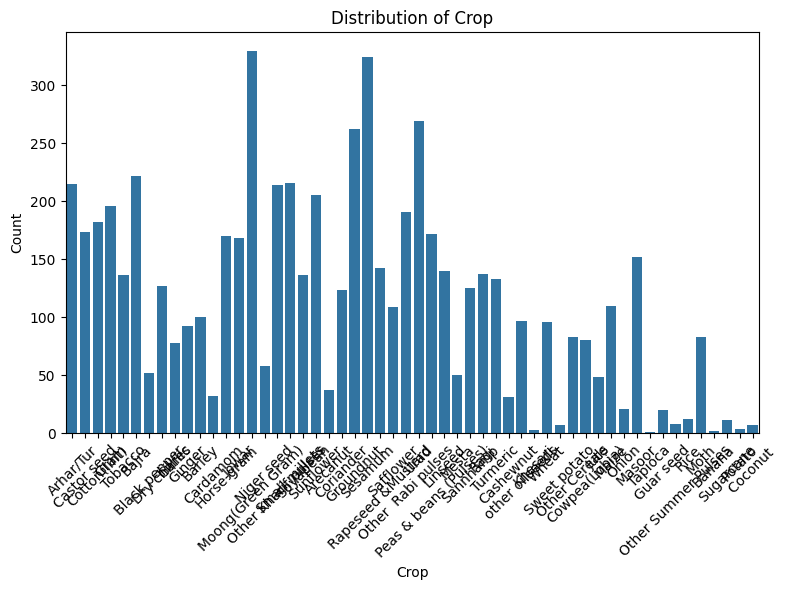

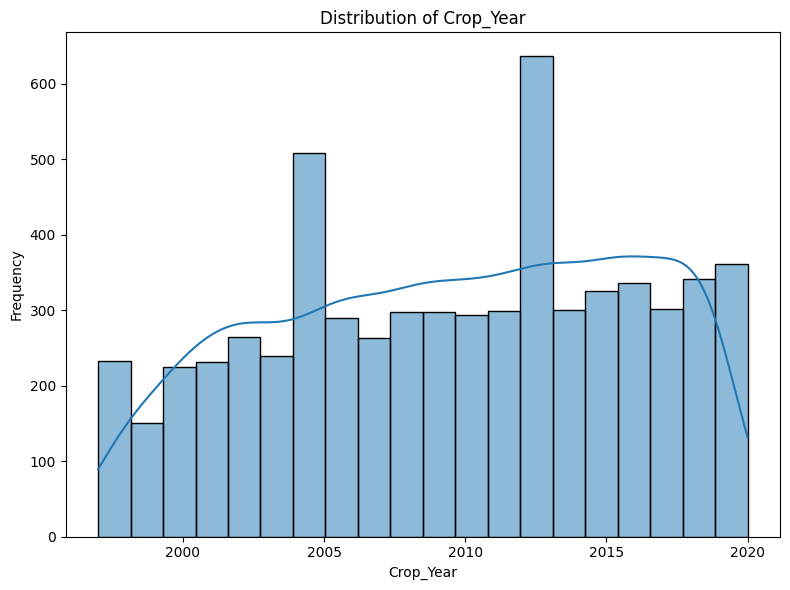

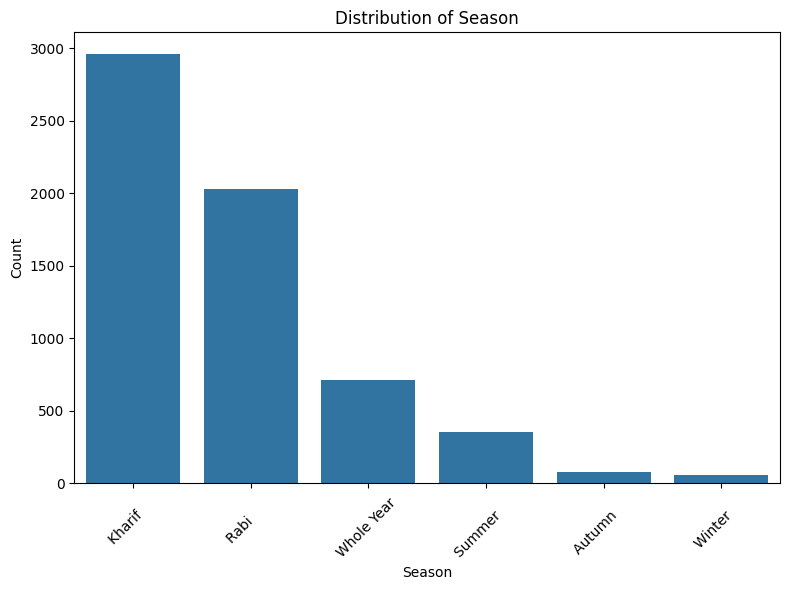

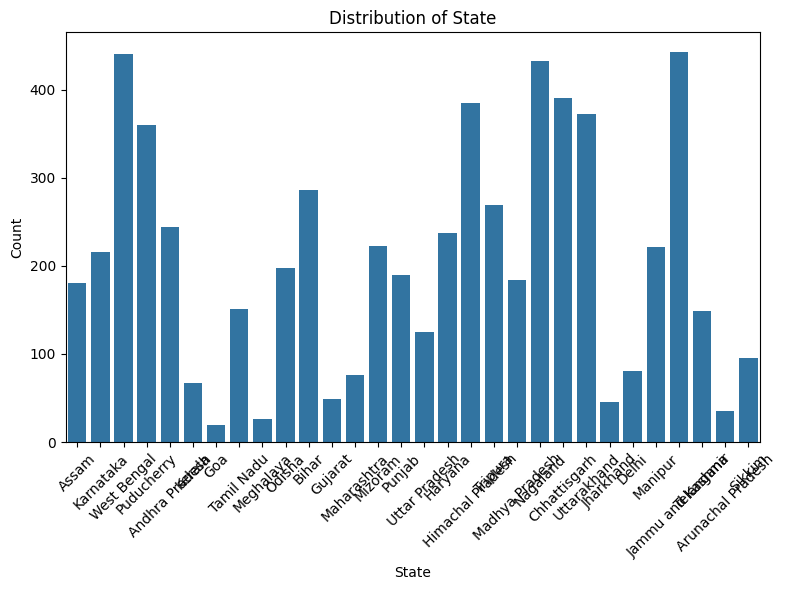

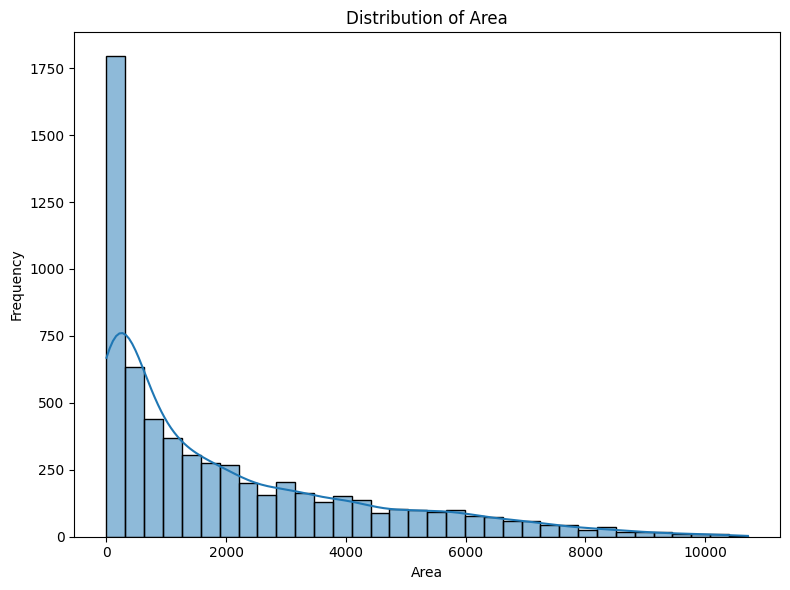

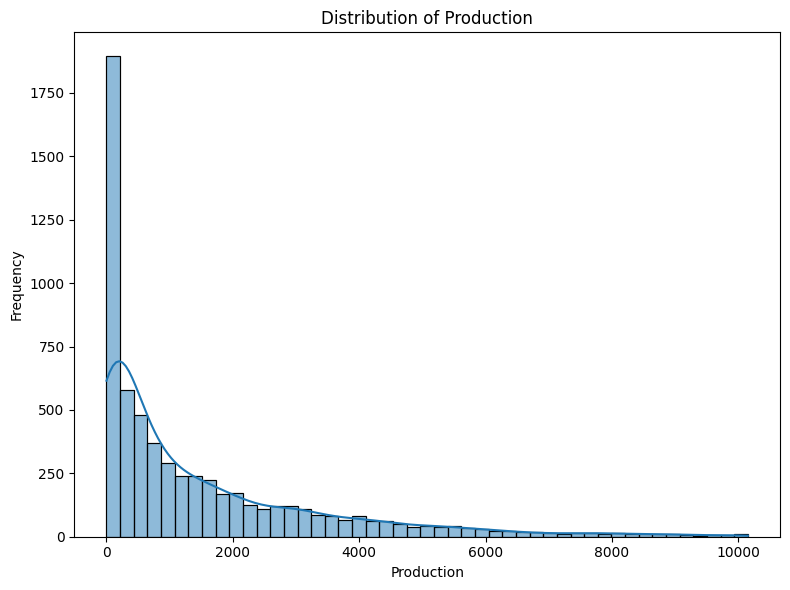

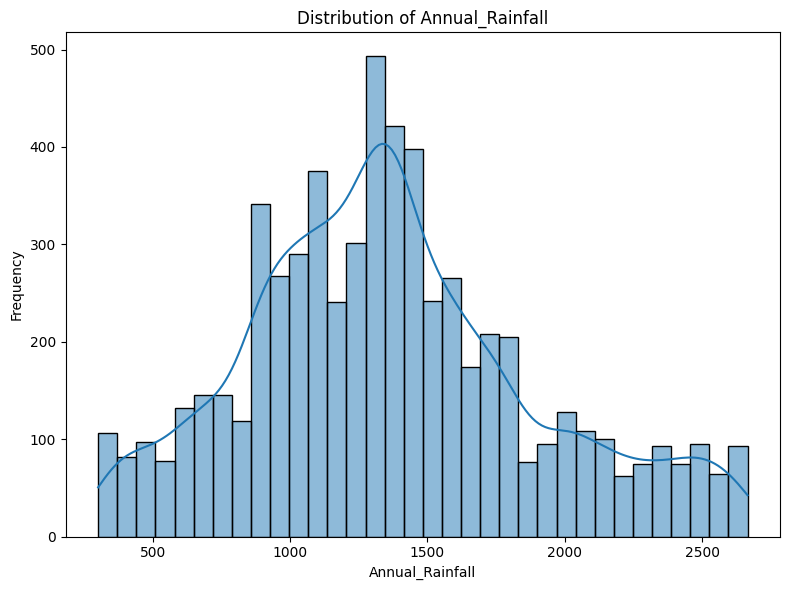

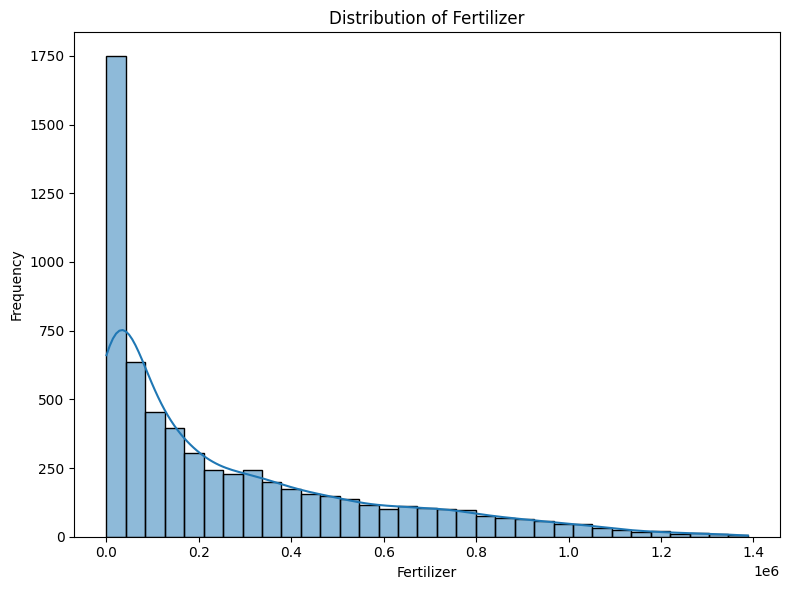

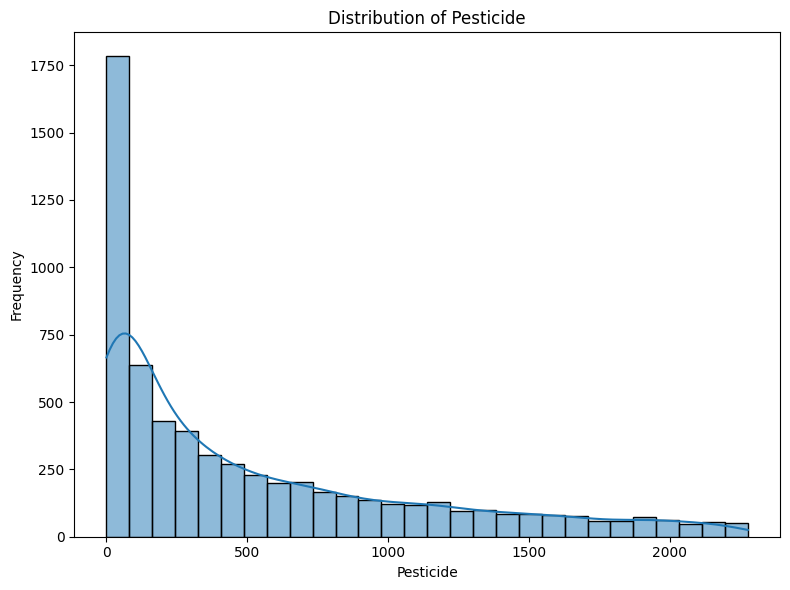

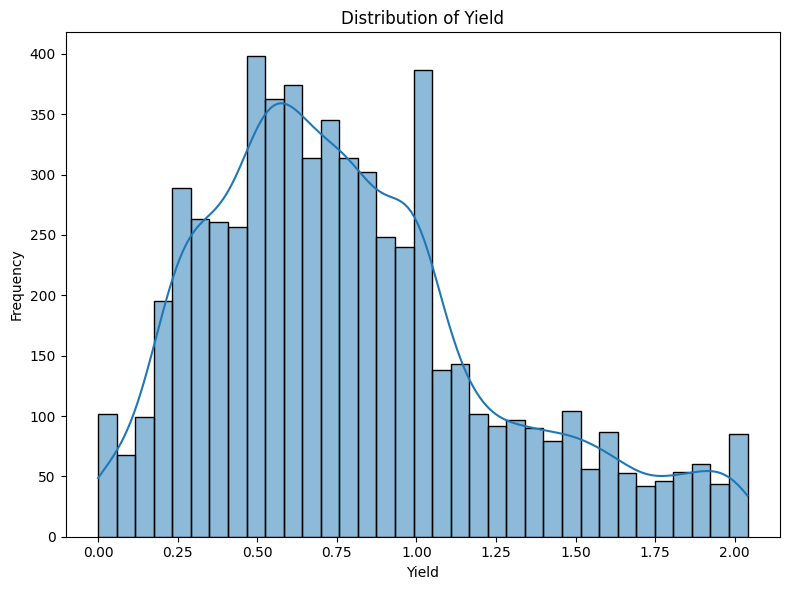

In [110]:
# prompt: Examine the distribution of each column

# Examine the distribution of each column
for column in new_crop.columns:
  plt.figure(figsize=(8, 6))
  if new_crop[column].dtype in ['int64', 'float64']:
    sns.histplot(new_crop[column], kde=True)
  else:
    sns.countplot(x=new_crop[column])
  plt.title(f"Distribution of {column}")
  plt.xlabel(column)
  plt.ylabel("Frequency" if new_crop[column].dtype in ['int64', 'float64'] else "Count")
  plt.xticks(rotation=45 if new_crop[column].dtype not in ['int64', 'float64'] else 0)
  plt.tight_layout()
  plt.show()


In [111]:
# Check the normality for numerical columns like Shapiro willk test for all the numerical columns

from scipy.stats import shapiro

for column in numerical:
  statistic, p_value = shapiro(new_crop[column])
  print(f"Shapiro-Wilk Test for {column}:")
  print(f"  Statistic: {statistic:.3f}")
  print(f"  P-value: {p_value:.3f}")
  alpha = 0.05
  if p_value > alpha:
    print('  Sample looks Gaussian (fail to reject H0)')
  else:
    print('  Sample does not look Gaussian (reject H0)')
  print()


Shapiro-Wilk Test for Area:
  Statistic: 0.831
  P-value: 0.000
  Sample does not look Gaussian (reject H0)

Shapiro-Wilk Test for Production:
  Statistic: 0.772
  P-value: 0.000
  Sample does not look Gaussian (reject H0)

Shapiro-Wilk Test for Annual_Rainfall:
  Statistic: 0.978
  P-value: 0.000
  Sample does not look Gaussian (reject H0)

Shapiro-Wilk Test for Fertilizer:
  Statistic: 0.835
  P-value: 0.000
  Sample does not look Gaussian (reject H0)

Shapiro-Wilk Test for Pesticide:
  Statistic: 0.830
  P-value: 0.000
  Sample does not look Gaussian (reject H0)

Shapiro-Wilk Test for Yield:
  Statistic: 0.954
  P-value: 0.000
  Sample does not look Gaussian (reject H0)



/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6191.
  res = hypotest_fun_out(*samples, **kwds)


Since all the numerical data are not normal we cannot use Pearson's correlation to exmine the relationship. We can use Spearman's Rank Correlation coefficient to examine the correlations among the variables

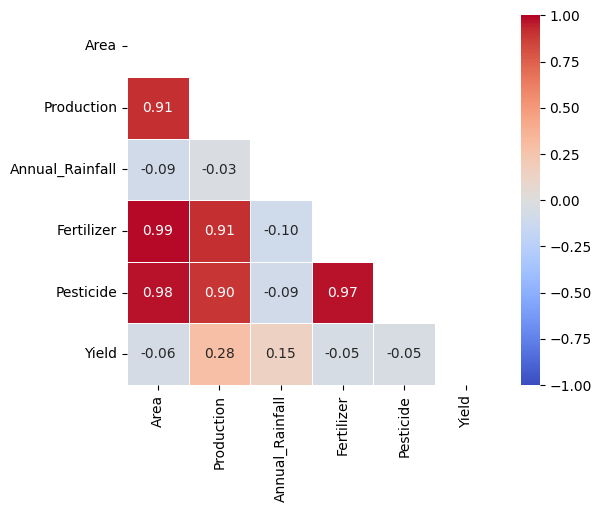

In [112]:
mask = np.triu(np.ones_like(new_crop[numerical].corr(method = 'spearman'), dtype=bool))

dataplot = sns.heatmap(new_crop[numerical].corr(method = 'spearman'),cmap = 'coolwarm',
                       vmin = -1, vmax = 1, center = 0, annot = True, fmt=".2f",
                       square=True, linewidths = 0.5, mask = mask)

plt.show()

A huge multicorrlinearity effects are present among the indepent variables.

In [113]:
# Normalize or standardize the data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_crop[numerical] = scaler.fit_transform(new_crop[numerical])


In [114]:
# Apply one hot encoding to the categorical data

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(new_crop[categorical])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical))
new_crop = pd.concat([one_hot_df, new_crop], axis=1)
new_crop.drop(categorical, axis=1, inplace=True)


In [115]:
new_crop.head()

,Crop_Arecanut,Crop_Arhar/Tur,Crop_Bajra,Crop_Banana,Crop_Barley,Crop_Black pepper,Crop_Cardamom,Crop_Cashewnut,Crop_Castor seed,Crop_Coconut,...,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.619163,0.461576,0.74047,0.455048,0.903604,0.348252
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.074217,0.002167,0.74047,0.054541,0.108338,0.116830
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.162196,0.078227,0.74047,0.119201,0.236730,0.206328
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.277884,0.148473,0.74047,0.204226,0.405559,0.228164
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.040351,0.002562,0.74047,0.029651,0.058914,0.186275


In [116]:
# Split data into training, validation, and test sets.

from sklearn.model_selection import train_test_split


X = new_crop.drop('Yield', axis=1)
y = new_crop['Yield']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 4952
Validation set size: 619
Test set size: 620
